# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

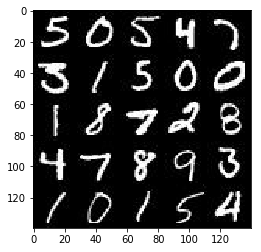

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

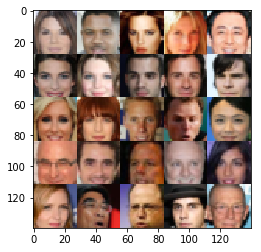

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests
import tensorflow as tf

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_dim = (image_width,image_height,image_channels)
    
    real_input = tf.placeholder(tf.float32, (None, *real_dim), name='real_input')
    z_input = tf.placeholder(tf.float32, (None, z_dim), name='z_input')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return real_input, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        x1 = tf.layers.conv2d(images, 32, 5, strides=2, padding='same')
        x1 = tf.maximum(alpha * x1, x1)
        #print(x1.get_shape())
        x2 = tf.layers.conv2d(x1, 64, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        #print(x2.get_shape())
        x3 = tf.layers.conv2d(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        #print(x3.get_shape())
        
        x4 = tf.layers.conv2d(x3, 256, 5, strides=2, padding='same')
        x4 = tf.layers.batch_normalization(x4, training=True)
        x4 = tf.maximum(alpha * x4, x4)
        #print(x4.get_shape())
        
        #x3 = tf.layers.conv2d(x2, 128, 5, strides=2, padding='same')
        #x3 = tf.layers.batch_normalization(x3, training=True)
        #x3 = tf.maximum(alpha * x3, x3)
        
        flat = tf.reshape(x4, (-1, 2*2*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        # shape = z
        x1 = tf.layers.dense(z, 4*4*1024)
        # 4 * 4 * 1024
        x1 = tf.reshape(x1, (-1, 4, 4, 1024))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #print(x1.get_shape())
        # 4,4,1024
        
        x2 = tf.layers.conv2d_transpose(x1, 512, kernel_size=5, strides=2, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #print(x2.get_shape())
        #11,11,512
        
        x3 = tf.layers.conv2d_transpose(x2, 256, kernel_size=5, strides = 2, padding='valid' )
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #print(x3.get_shape())
        #25,25,256
        
        x4 = tf.layers.conv2d_transpose(x3, 128, 4, strides=1, padding='valid')
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        #28,28,128
        
        #print(x4.get_shape())
        # Output layer
        logits = tf.layers.conv2d_transpose(x4, filters=out_channel_dim, kernel_size=4, strides=1, padding='same')
        #28,28,out_channel_dim
        print(logits.get_shape())
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

(?, 28, 28, 5)
(?, 28, 28, 5)
Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

(?, 28, 28, 4)
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #saver = tf.train.Saver()
    print(data_shape)
    total_pics, width, height, channels = data_shape
    real_in, z_in, lr = model_inputs(width, height, channels, z_dim)
    
    d_loss, g_loss = model_loss(real_in, z_in, channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    iteration = 0
    print_interval = 10
    display_interval = 100
    display_quantity = 16
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                iteration += 1
                
                # normalize range of real images to be between -1 and 1
                batch_images *= 2
                # generate a random noise
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # run optimizers
                sess.run(d_train_opt, feed_dict={real_in : batch_images, z_in : batch_z, lr : learning_rate})
                sess.run(g_train_opt, feed_dict={real_in : batch_images, z_in : batch_z, lr : learning_rate})
        
                if iteration % print_interval == 0:
                    train_d_loss =d_loss.eval({real_in : batch_images, z_in: batch_z})
                    train_g_loss = g_loss.eval({z_in : batch_z})
                    print("Epoch {} of {}. Iteration {}".format(epoch_i + 1, epochs, iteration))
                    print("  Discriminator Loss: {:.4f} || Generator Loss: {:.4f}".format(train_d_loss, train_g_loss))
                    
                if iteration % display_interval == 0:
                    show_generator_output(sess, display_quantity,  z_in, channels, data_image_mode)

        #saver.save(sess, './generator.ckpt')

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

(60000, 28, 28, 1)
(?, 28, 28, 1)
Epoch 1 of 2. Iteration 10
  Discriminator Loss: 0.3203 || Generator Loss: 8.7074
Epoch 1 of 2. Iteration 20
  Discriminator Loss: 0.3642 || Generator Loss: 9.0726
Epoch 1 of 2. Iteration 30
  Discriminator Loss: 0.1871 || Generator Loss: 2.0593
Epoch 1 of 2. Iteration 40
  Discriminator Loss: 0.6499 || Generator Loss: 3.7083
Epoch 1 of 2. Iteration 50
  Discriminator Loss: 0.0847 || Generator Loss: 3.9226
Epoch 1 of 2. Iteration 60
  Discriminator Loss: 0.1999 || Generator Loss: 3.0695
Epoch 1 of 2. Iteration 70
  Discriminator Loss: 0.2105 || Generator Loss: 4.1271
Epoch 1 of 2. Iteration 80
  Discriminator Loss: 0.3786 || Generator Loss: 5.8944
Epoch 1 of 2. Iteration 90
  Discriminator Loss: 1.0012 || Generator Loss: 1.4802
Epoch 1 of 2. Iteration 100
  Discriminator Loss: 1.5832 || Generator Loss: 0.9517
(?, 28, 28, 1)


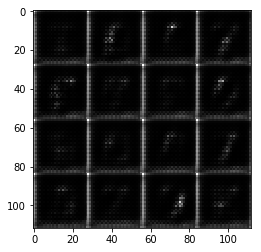

Epoch 1 of 2. Iteration 110
  Discriminator Loss: 1.1641 || Generator Loss: 1.6310
Epoch 1 of 2. Iteration 120
  Discriminator Loss: 0.6707 || Generator Loss: 1.8925
Epoch 1 of 2. Iteration 130
  Discriminator Loss: 0.5779 || Generator Loss: 1.6376
Epoch 1 of 2. Iteration 140
  Discriminator Loss: 0.7262 || Generator Loss: 1.2827
Epoch 1 of 2. Iteration 150
  Discriminator Loss: 1.3489 || Generator Loss: 3.0104
Epoch 1 of 2. Iteration 160
  Discriminator Loss: 1.0925 || Generator Loss: 0.9359
Epoch 1 of 2. Iteration 170
  Discriminator Loss: 1.1227 || Generator Loss: 0.7981
Epoch 1 of 2. Iteration 180
  Discriminator Loss: 1.2902 || Generator Loss: 0.5692
Epoch 1 of 2. Iteration 190
  Discriminator Loss: 1.4755 || Generator Loss: 2.3298
Epoch 1 of 2. Iteration 200
  Discriminator Loss: 1.1408 || Generator Loss: 1.8988
(?, 28, 28, 1)


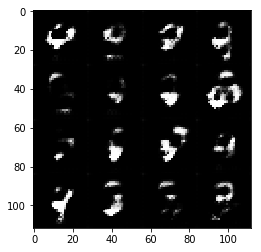

Epoch 1 of 2. Iteration 210
  Discriminator Loss: 0.8179 || Generator Loss: 1.4903
Epoch 1 of 2. Iteration 220
  Discriminator Loss: 0.8935 || Generator Loss: 0.8284
Epoch 1 of 2. Iteration 230
  Discriminator Loss: 0.8513 || Generator Loss: 1.4824
Epoch 1 of 2. Iteration 240
  Discriminator Loss: 0.8670 || Generator Loss: 1.4575
Epoch 1 of 2. Iteration 250
  Discriminator Loss: 0.7902 || Generator Loss: 1.3365
Epoch 1 of 2. Iteration 260
  Discriminator Loss: 0.8314 || Generator Loss: 1.0616
Epoch 1 of 2. Iteration 270
  Discriminator Loss: 1.3373 || Generator Loss: 0.4826
Epoch 1 of 2. Iteration 280
  Discriminator Loss: 0.9205 || Generator Loss: 0.8819
Epoch 1 of 2. Iteration 290
  Discriminator Loss: 1.0226 || Generator Loss: 1.0586
Epoch 1 of 2. Iteration 300
  Discriminator Loss: 0.8600 || Generator Loss: 1.1031
(?, 28, 28, 1)


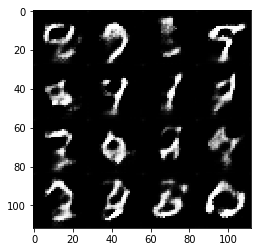

Epoch 1 of 2. Iteration 310
  Discriminator Loss: 1.1209 || Generator Loss: 2.2055
Epoch 1 of 2. Iteration 320
  Discriminator Loss: 1.0316 || Generator Loss: 0.8061
Epoch 1 of 2. Iteration 330
  Discriminator Loss: 1.0570 || Generator Loss: 0.8872
Epoch 1 of 2. Iteration 340
  Discriminator Loss: 1.1734 || Generator Loss: 0.9897
Epoch 1 of 2. Iteration 350
  Discriminator Loss: 1.1176 || Generator Loss: 0.5544
Epoch 1 of 2. Iteration 360
  Discriminator Loss: 0.7850 || Generator Loss: 1.3535
Epoch 1 of 2. Iteration 370
  Discriminator Loss: 1.0666 || Generator Loss: 0.8193
Epoch 1 of 2. Iteration 380
  Discriminator Loss: 1.0255 || Generator Loss: 0.9432
Epoch 1 of 2. Iteration 390
  Discriminator Loss: 0.9154 || Generator Loss: 1.1860
Epoch 1 of 2. Iteration 400
  Discriminator Loss: 1.3347 || Generator Loss: 0.4674
(?, 28, 28, 1)


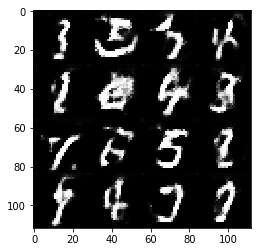

Epoch 1 of 2. Iteration 410
  Discriminator Loss: 1.3052 || Generator Loss: 2.2245
Epoch 1 of 2. Iteration 420
  Discriminator Loss: 1.0381 || Generator Loss: 0.7063
Epoch 1 of 2. Iteration 430
  Discriminator Loss: 0.9810 || Generator Loss: 0.8361
Epoch 1 of 2. Iteration 440
  Discriminator Loss: 1.1929 || Generator Loss: 1.0434
Epoch 1 of 2. Iteration 450
  Discriminator Loss: 1.0834 || Generator Loss: 0.6238
Epoch 1 of 2. Iteration 460
  Discriminator Loss: 0.8266 || Generator Loss: 1.0474
Epoch 1 of 2. Iteration 470
  Discriminator Loss: 1.2527 || Generator Loss: 0.4524
Epoch 1 of 2. Iteration 480
  Discriminator Loss: 1.0438 || Generator Loss: 0.7795
Epoch 1 of 2. Iteration 490
  Discriminator Loss: 0.9575 || Generator Loss: 0.8356
Epoch 1 of 2. Iteration 500
  Discriminator Loss: 1.1040 || Generator Loss: 1.0381
(?, 28, 28, 1)


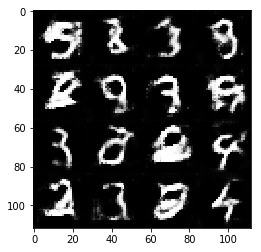

Epoch 1 of 2. Iteration 510
  Discriminator Loss: 1.1117 || Generator Loss: 0.7763
Epoch 1 of 2. Iteration 520
  Discriminator Loss: 0.9153 || Generator Loss: 0.9997
Epoch 1 of 2. Iteration 530
  Discriminator Loss: 1.0966 || Generator Loss: 0.7686
Epoch 1 of 2. Iteration 540
  Discriminator Loss: 1.0505 || Generator Loss: 0.6292
Epoch 1 of 2. Iteration 550
  Discriminator Loss: 0.9789 || Generator Loss: 0.8533
Epoch 1 of 2. Iteration 560
  Discriminator Loss: 1.5591 || Generator Loss: 0.3628
Epoch 1 of 2. Iteration 570
  Discriminator Loss: 1.1520 || Generator Loss: 0.6654
Epoch 1 of 2. Iteration 580
  Discriminator Loss: 0.8518 || Generator Loss: 0.9618
Epoch 1 of 2. Iteration 590
  Discriminator Loss: 0.9940 || Generator Loss: 0.8198
Epoch 1 of 2. Iteration 600
  Discriminator Loss: 0.9387 || Generator Loss: 0.8657
(?, 28, 28, 1)


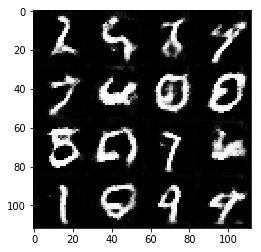

Epoch 1 of 2. Iteration 610
  Discriminator Loss: 1.2481 || Generator Loss: 0.6590
Epoch 1 of 2. Iteration 620
  Discriminator Loss: 1.0534 || Generator Loss: 0.7586
Epoch 1 of 2. Iteration 630
  Discriminator Loss: 0.9718 || Generator Loss: 1.2426
Epoch 1 of 2. Iteration 640
  Discriminator Loss: 1.0469 || Generator Loss: 1.0194
Epoch 1 of 2. Iteration 650
  Discriminator Loss: 1.2134 || Generator Loss: 0.8456
Epoch 1 of 2. Iteration 660
  Discriminator Loss: 0.9674 || Generator Loss: 0.8750
Epoch 1 of 2. Iteration 670
  Discriminator Loss: 0.9949 || Generator Loss: 0.8536
Epoch 1 of 2. Iteration 680
  Discriminator Loss: 1.0343 || Generator Loss: 1.1188
Epoch 1 of 2. Iteration 690
  Discriminator Loss: 1.1835 || Generator Loss: 0.8487
Epoch 1 of 2. Iteration 700
  Discriminator Loss: 0.7360 || Generator Loss: 1.0314
(?, 28, 28, 1)


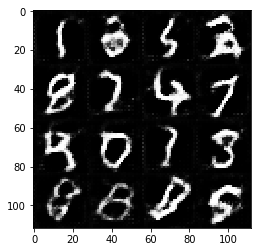

Epoch 1 of 2. Iteration 710
  Discriminator Loss: 0.9340 || Generator Loss: 0.8811
Epoch 1 of 2. Iteration 720
  Discriminator Loss: 1.0539 || Generator Loss: 0.8170
Epoch 1 of 2. Iteration 730
  Discriminator Loss: 1.3510 || Generator Loss: 0.6667
Epoch 1 of 2. Iteration 740
  Discriminator Loss: 0.9180 || Generator Loss: 1.0368
Epoch 1 of 2. Iteration 750
  Discriminator Loss: 1.2138 || Generator Loss: 1.0575
Epoch 1 of 2. Iteration 760
  Discriminator Loss: 0.9463 || Generator Loss: 0.9057
Epoch 1 of 2. Iteration 770
  Discriminator Loss: 0.9489 || Generator Loss: 0.8539
Epoch 1 of 2. Iteration 780
  Discriminator Loss: 0.9932 || Generator Loss: 1.0700
Epoch 1 of 2. Iteration 790
  Discriminator Loss: 1.2519 || Generator Loss: 1.3799
Epoch 1 of 2. Iteration 800
  Discriminator Loss: 0.9076 || Generator Loss: 1.0067
(?, 28, 28, 1)


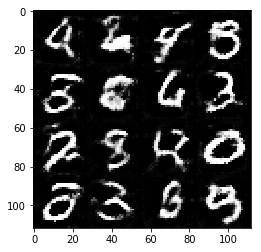

Epoch 1 of 2. Iteration 810
  Discriminator Loss: 1.1171 || Generator Loss: 0.6319
Epoch 1 of 2. Iteration 820
  Discriminator Loss: 1.4092 || Generator Loss: 0.5189
Epoch 1 of 2. Iteration 830
  Discriminator Loss: 0.9397 || Generator Loss: 0.8329
Epoch 1 of 2. Iteration 840
  Discriminator Loss: 1.1638 || Generator Loss: 0.9155
Epoch 1 of 2. Iteration 850
  Discriminator Loss: 1.1245 || Generator Loss: 0.8683
Epoch 1 of 2. Iteration 860
  Discriminator Loss: 0.9966 || Generator Loss: 0.7182
Epoch 1 of 2. Iteration 870
  Discriminator Loss: 1.1269 || Generator Loss: 0.8658
Epoch 1 of 2. Iteration 880
  Discriminator Loss: 1.1454 || Generator Loss: 0.7668
Epoch 1 of 2. Iteration 890
  Discriminator Loss: 1.1257 || Generator Loss: 0.7180
Epoch 1 of 2. Iteration 900
  Discriminator Loss: 1.4574 || Generator Loss: 1.4488
(?, 28, 28, 1)


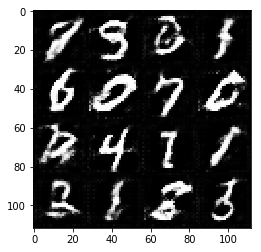

Epoch 1 of 2. Iteration 910
  Discriminator Loss: 1.1912 || Generator Loss: 0.5462
Epoch 1 of 2. Iteration 920
  Discriminator Loss: 1.0494 || Generator Loss: 0.7382
Epoch 1 of 2. Iteration 930
  Discriminator Loss: 1.1148 || Generator Loss: 0.7428
Epoch 1 of 2. Iteration 940
  Discriminator Loss: 1.0921 || Generator Loss: 1.0557
Epoch 1 of 2. Iteration 950
  Discriminator Loss: 1.3238 || Generator Loss: 1.2474
Epoch 1 of 2. Iteration 960
  Discriminator Loss: 1.0629 || Generator Loss: 0.7001
Epoch 1 of 2. Iteration 970
  Discriminator Loss: 1.0418 || Generator Loss: 0.9614
Epoch 1 of 2. Iteration 980
  Discriminator Loss: 0.8715 || Generator Loss: 1.0155
Epoch 1 of 2. Iteration 990
  Discriminator Loss: 0.9425 || Generator Loss: 0.8425
Epoch 1 of 2. Iteration 1000
  Discriminator Loss: 1.0807 || Generator Loss: 0.8178
(?, 28, 28, 1)


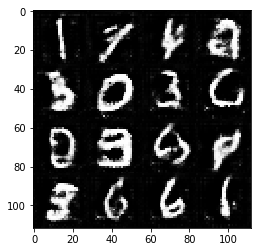

Epoch 1 of 2. Iteration 1010
  Discriminator Loss: 1.1004 || Generator Loss: 0.6458
Epoch 1 of 2. Iteration 1020
  Discriminator Loss: 0.9659 || Generator Loss: 0.9722
Epoch 1 of 2. Iteration 1030
  Discriminator Loss: 1.3966 || Generator Loss: 0.4112
Epoch 1 of 2. Iteration 1040
  Discriminator Loss: 1.1606 || Generator Loss: 0.6874
Epoch 1 of 2. Iteration 1050
  Discriminator Loss: 0.7080 || Generator Loss: 1.1801
Epoch 1 of 2. Iteration 1060
  Discriminator Loss: 1.2406 || Generator Loss: 0.4416
Epoch 1 of 2. Iteration 1070
  Discriminator Loss: 1.0255 || Generator Loss: 0.7561
Epoch 1 of 2. Iteration 1080
  Discriminator Loss: 1.1441 || Generator Loss: 0.6463
Epoch 1 of 2. Iteration 1090
  Discriminator Loss: 1.2605 || Generator Loss: 0.6014
Epoch 1 of 2. Iteration 1100
  Discriminator Loss: 0.8695 || Generator Loss: 1.0204
(?, 28, 28, 1)


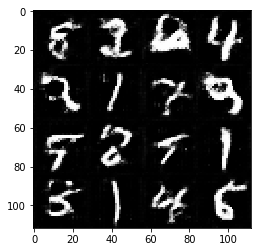

Epoch 1 of 2. Iteration 1110
  Discriminator Loss: 1.3340 || Generator Loss: 0.4879
Epoch 1 of 2. Iteration 1120
  Discriminator Loss: 0.8945 || Generator Loss: 0.8323
Epoch 1 of 2. Iteration 1130
  Discriminator Loss: 1.3650 || Generator Loss: 0.5896
Epoch 1 of 2. Iteration 1140
  Discriminator Loss: 1.1907 || Generator Loss: 0.5971
Epoch 1 of 2. Iteration 1150
  Discriminator Loss: 1.0366 || Generator Loss: 0.9762
Epoch 1 of 2. Iteration 1160
  Discriminator Loss: 0.8264 || Generator Loss: 1.3591
Epoch 1 of 2. Iteration 1170
  Discriminator Loss: 1.0441 || Generator Loss: 0.7276
Epoch 1 of 2. Iteration 1180
  Discriminator Loss: 1.4870 || Generator Loss: 0.3816
Epoch 1 of 2. Iteration 1190
  Discriminator Loss: 1.5243 || Generator Loss: 0.3583
Epoch 1 of 2. Iteration 1200
  Discriminator Loss: 1.2359 || Generator Loss: 0.8527
(?, 28, 28, 1)


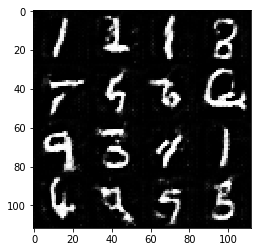

Epoch 2 of 2. Iteration 1210
  Discriminator Loss: 1.0021 || Generator Loss: 1.2101
Epoch 2 of 2. Iteration 1220
  Discriminator Loss: 1.0504 || Generator Loss: 0.7518
Epoch 2 of 2. Iteration 1230
  Discriminator Loss: 1.1410 || Generator Loss: 0.8888
Epoch 2 of 2. Iteration 1240
  Discriminator Loss: 0.8297 || Generator Loss: 0.9765
Epoch 2 of 2. Iteration 1250
  Discriminator Loss: 1.3582 || Generator Loss: 0.4137
Epoch 2 of 2. Iteration 1260
  Discriminator Loss: 1.0631 || Generator Loss: 0.9123
Epoch 2 of 2. Iteration 1270
  Discriminator Loss: 0.9540 || Generator Loss: 1.6774
Epoch 2 of 2. Iteration 1280
  Discriminator Loss: 1.3056 || Generator Loss: 0.4738
Epoch 2 of 2. Iteration 1290
  Discriminator Loss: 1.4062 || Generator Loss: 0.4082
Epoch 2 of 2. Iteration 1300
  Discriminator Loss: 1.1454 || Generator Loss: 0.5876
(?, 28, 28, 1)


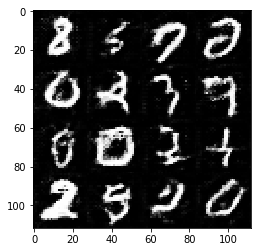

Epoch 2 of 2. Iteration 1310
  Discriminator Loss: 1.1291 || Generator Loss: 0.8455
Epoch 2 of 2. Iteration 1320
  Discriminator Loss: 1.0988 || Generator Loss: 0.6984
Epoch 2 of 2. Iteration 1330
  Discriminator Loss: 1.1531 || Generator Loss: 0.6137
Epoch 2 of 2. Iteration 1340
  Discriminator Loss: 1.1037 || Generator Loss: 0.8991
Epoch 2 of 2. Iteration 1350
  Discriminator Loss: 1.5626 || Generator Loss: 0.3157
Epoch 2 of 2. Iteration 1360
  Discriminator Loss: 1.0796 || Generator Loss: 0.6192
Epoch 2 of 2. Iteration 1370
  Discriminator Loss: 1.0721 || Generator Loss: 0.6918
Epoch 2 of 2. Iteration 1380
  Discriminator Loss: 1.1044 || Generator Loss: 0.7025
Epoch 2 of 2. Iteration 1390
  Discriminator Loss: 1.1908 || Generator Loss: 0.4866
Epoch 2 of 2. Iteration 1400
  Discriminator Loss: 0.9752 || Generator Loss: 1.2438
(?, 28, 28, 1)


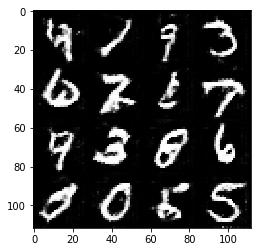

Epoch 2 of 2. Iteration 1410
  Discriminator Loss: 1.0108 || Generator Loss: 0.8584
Epoch 2 of 2. Iteration 1420
  Discriminator Loss: 1.1278 || Generator Loss: 0.6524
Epoch 2 of 2. Iteration 1430
  Discriminator Loss: 1.3276 || Generator Loss: 0.4812
Epoch 2 of 2. Iteration 1440
  Discriminator Loss: 1.0782 || Generator Loss: 0.7669
Epoch 2 of 2. Iteration 1450
  Discriminator Loss: 0.9140 || Generator Loss: 0.8811
Epoch 2 of 2. Iteration 1460
  Discriminator Loss: 1.0329 || Generator Loss: 0.7362
Epoch 2 of 2. Iteration 1470
  Discriminator Loss: 1.0993 || Generator Loss: 0.8333
Epoch 2 of 2. Iteration 1480
  Discriminator Loss: 1.4434 || Generator Loss: 0.4803
Epoch 2 of 2. Iteration 1490
  Discriminator Loss: 1.3160 || Generator Loss: 0.4512
Epoch 2 of 2. Iteration 1500
  Discriminator Loss: 1.0896 || Generator Loss: 0.6094
(?, 28, 28, 1)


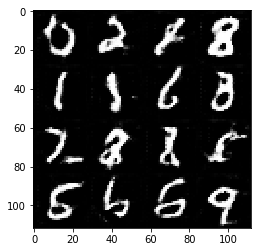

Epoch 2 of 2. Iteration 1510
  Discriminator Loss: 0.9827 || Generator Loss: 0.7975
Epoch 2 of 2. Iteration 1520
  Discriminator Loss: 1.4733 || Generator Loss: 0.3532
Epoch 2 of 2. Iteration 1530
  Discriminator Loss: 1.1344 || Generator Loss: 0.5543
Epoch 2 of 2. Iteration 1540
  Discriminator Loss: 1.4559 || Generator Loss: 0.3986
Epoch 2 of 2. Iteration 1550
  Discriminator Loss: 0.9481 || Generator Loss: 0.6635
Epoch 2 of 2. Iteration 1560
  Discriminator Loss: 1.0694 || Generator Loss: 0.6023
Epoch 2 of 2. Iteration 1570
  Discriminator Loss: 1.0707 || Generator Loss: 1.1921
Epoch 2 of 2. Iteration 1580
  Discriminator Loss: 1.0612 || Generator Loss: 0.6380
Epoch 2 of 2. Iteration 1590
  Discriminator Loss: 0.8592 || Generator Loss: 0.7455
Epoch 2 of 2. Iteration 1600
  Discriminator Loss: 1.2484 || Generator Loss: 0.4725
(?, 28, 28, 1)


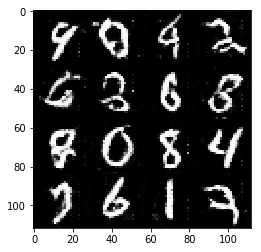

Epoch 2 of 2. Iteration 1610
  Discriminator Loss: 0.9358 || Generator Loss: 0.8290
Epoch 2 of 2. Iteration 1620
  Discriminator Loss: 1.1173 || Generator Loss: 0.5692
Epoch 2 of 2. Iteration 1630
  Discriminator Loss: 1.3531 || Generator Loss: 0.4495
Epoch 2 of 2. Iteration 1640
  Discriminator Loss: 0.8592 || Generator Loss: 1.2301
Epoch 2 of 2. Iteration 1650
  Discriminator Loss: 0.8398 || Generator Loss: 0.8338
Epoch 2 of 2. Iteration 1660
  Discriminator Loss: 0.9438 || Generator Loss: 0.9456
Epoch 2 of 2. Iteration 1670
  Discriminator Loss: 1.2095 || Generator Loss: 0.5156
Epoch 2 of 2. Iteration 1680
  Discriminator Loss: 0.9679 || Generator Loss: 0.8219
Epoch 2 of 2. Iteration 1690
  Discriminator Loss: 0.9928 || Generator Loss: 0.8915
Epoch 2 of 2. Iteration 1700
  Discriminator Loss: 0.9114 || Generator Loss: 0.7509
(?, 28, 28, 1)


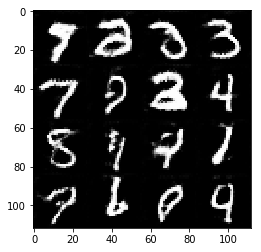

Epoch 2 of 2. Iteration 1710
  Discriminator Loss: 1.1784 || Generator Loss: 0.5219
Epoch 2 of 2. Iteration 1720
  Discriminator Loss: 0.9965 || Generator Loss: 0.8241
Epoch 2 of 2. Iteration 1730
  Discriminator Loss: 1.2217 || Generator Loss: 0.6953
Epoch 2 of 2. Iteration 1740
  Discriminator Loss: 1.1602 || Generator Loss: 0.5847
Epoch 2 of 2. Iteration 1750
  Discriminator Loss: 1.3721 || Generator Loss: 0.4292
Epoch 2 of 2. Iteration 1760
  Discriminator Loss: 0.9401 || Generator Loss: 0.7652
Epoch 2 of 2. Iteration 1770
  Discriminator Loss: 1.2930 || Generator Loss: 0.4449
Epoch 2 of 2. Iteration 1780
  Discriminator Loss: 0.8941 || Generator Loss: 0.9021
Epoch 2 of 2. Iteration 1790
  Discriminator Loss: 0.9900 || Generator Loss: 1.2630
Epoch 2 of 2. Iteration 1800
  Discriminator Loss: 1.2012 || Generator Loss: 0.9272
(?, 28, 28, 1)


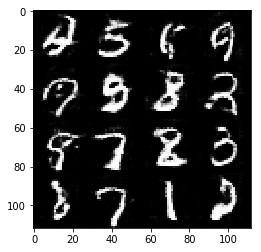

Epoch 2 of 2. Iteration 1810
  Discriminator Loss: 1.1312 || Generator Loss: 0.7157
Epoch 2 of 2. Iteration 1820
  Discriminator Loss: 1.0692 || Generator Loss: 0.6155
Epoch 2 of 2. Iteration 1830
  Discriminator Loss: 1.0435 || Generator Loss: 1.3792
Epoch 2 of 2. Iteration 1840
  Discriminator Loss: 1.0484 || Generator Loss: 0.5757
Epoch 2 of 2. Iteration 1850
  Discriminator Loss: 0.9638 || Generator Loss: 0.7231
Epoch 2 of 2. Iteration 1860
  Discriminator Loss: 0.9412 || Generator Loss: 0.6898
Epoch 2 of 2. Iteration 1870
  Discriminator Loss: 0.8896 || Generator Loss: 1.1714
Epoch 2 of 2. Iteration 1880
  Discriminator Loss: 0.7293 || Generator Loss: 0.9011
Epoch 2 of 2. Iteration 1890
  Discriminator Loss: 0.9962 || Generator Loss: 0.7451
Epoch 2 of 2. Iteration 1900
  Discriminator Loss: 1.1377 || Generator Loss: 0.6609
(?, 28, 28, 1)


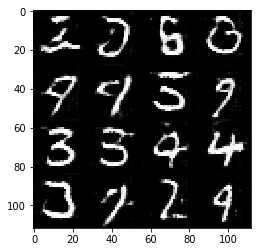

Epoch 2 of 2. Iteration 1910
  Discriminator Loss: 1.0583 || Generator Loss: 0.6376
Epoch 2 of 2. Iteration 1920
  Discriminator Loss: 1.3642 || Generator Loss: 1.7785
Epoch 2 of 2. Iteration 1930
  Discriminator Loss: 1.2125 || Generator Loss: 1.1020
Epoch 2 of 2. Iteration 1940
  Discriminator Loss: 1.3617 || Generator Loss: 0.4156
Epoch 2 of 2. Iteration 1950
  Discriminator Loss: 0.8866 || Generator Loss: 1.0288
Epoch 2 of 2. Iteration 1960
  Discriminator Loss: 1.0450 || Generator Loss: 0.6900
Epoch 2 of 2. Iteration 1970
  Discriminator Loss: 1.0722 || Generator Loss: 0.6189
Epoch 2 of 2. Iteration 1980
  Discriminator Loss: 1.1115 || Generator Loss: 0.5151
Epoch 2 of 2. Iteration 1990
  Discriminator Loss: 0.9853 || Generator Loss: 1.1398
Epoch 2 of 2. Iteration 2000
  Discriminator Loss: 1.8261 || Generator Loss: 0.2536
(?, 28, 28, 1)


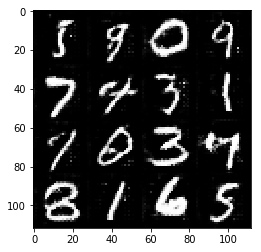

Epoch 2 of 2. Iteration 2010
  Discriminator Loss: 1.2669 || Generator Loss: 0.4878
Epoch 2 of 2. Iteration 2020
  Discriminator Loss: 1.0495 || Generator Loss: 0.5954
Epoch 2 of 2. Iteration 2030
  Discriminator Loss: 0.9513 || Generator Loss: 0.7384
Epoch 2 of 2. Iteration 2040
  Discriminator Loss: 1.4887 || Generator Loss: 0.4929
Epoch 2 of 2. Iteration 2050
  Discriminator Loss: 1.4948 || Generator Loss: 0.4562
Epoch 2 of 2. Iteration 2060
  Discriminator Loss: 1.0715 || Generator Loss: 0.5928
Epoch 2 of 2. Iteration 2070
  Discriminator Loss: 0.9057 || Generator Loss: 0.8076
Epoch 2 of 2. Iteration 2080
  Discriminator Loss: 0.9211 || Generator Loss: 0.9502
Epoch 2 of 2. Iteration 2090
  Discriminator Loss: 1.0643 || Generator Loss: 0.5605
Epoch 2 of 2. Iteration 2100
  Discriminator Loss: 1.2100 || Generator Loss: 1.4914
(?, 28, 28, 1)


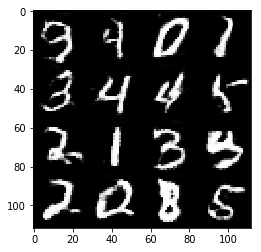

Epoch 2 of 2. Iteration 2110
  Discriminator Loss: 1.0353 || Generator Loss: 0.6002
Epoch 2 of 2. Iteration 2120
  Discriminator Loss: 1.1337 || Generator Loss: 0.5635
Epoch 2 of 2. Iteration 2130
  Discriminator Loss: 1.6192 || Generator Loss: 0.3251
Epoch 2 of 2. Iteration 2140
  Discriminator Loss: 1.6120 || Generator Loss: 0.3163
Epoch 2 of 2. Iteration 2150
  Discriminator Loss: 1.1987 || Generator Loss: 0.4956
Epoch 2 of 2. Iteration 2160
  Discriminator Loss: 0.8177 || Generator Loss: 1.1593
Epoch 2 of 2. Iteration 2170
  Discriminator Loss: 0.9846 || Generator Loss: 1.0051
Epoch 2 of 2. Iteration 2180
  Discriminator Loss: 1.4022 || Generator Loss: 1.1546
Epoch 2 of 2. Iteration 2190
  Discriminator Loss: 1.2247 || Generator Loss: 0.8586
Epoch 2 of 2. Iteration 2200
  Discriminator Loss: 1.1486 || Generator Loss: 0.8596
(?, 28, 28, 1)


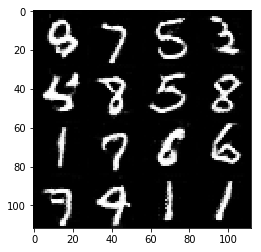

Epoch 2 of 2. Iteration 2210
  Discriminator Loss: 1.2375 || Generator Loss: 0.5369
Epoch 2 of 2. Iteration 2220
  Discriminator Loss: 0.9797 || Generator Loss: 0.8478
Epoch 2 of 2. Iteration 2230
  Discriminator Loss: 0.8624 || Generator Loss: 1.4136
Epoch 2 of 2. Iteration 2240
  Discriminator Loss: 0.6880 || Generator Loss: 1.1277
Epoch 2 of 2. Iteration 2250
  Discriminator Loss: 0.8665 || Generator Loss: 0.9114
Epoch 2 of 2. Iteration 2260
  Discriminator Loss: 0.8011 || Generator Loss: 0.8223
Epoch 2 of 2. Iteration 2270
  Discriminator Loss: 0.6450 || Generator Loss: 1.3055
Epoch 2 of 2. Iteration 2280
  Discriminator Loss: 0.9933 || Generator Loss: 0.6782
Epoch 2 of 2. Iteration 2290
  Discriminator Loss: 0.7255 || Generator Loss: 0.9056
Epoch 2 of 2. Iteration 2300
  Discriminator Loss: 0.7801 || Generator Loss: 0.9102
(?, 28, 28, 1)


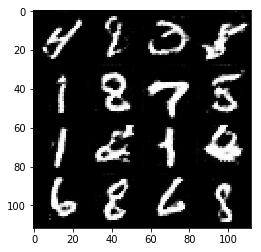

Epoch 2 of 2. Iteration 2310
  Discriminator Loss: 1.1045 || Generator Loss: 0.9537
Epoch 2 of 2. Iteration 2320
  Discriminator Loss: 0.8145 || Generator Loss: 1.4609
Epoch 2 of 2. Iteration 2330
  Discriminator Loss: 1.0116 || Generator Loss: 0.7919
Epoch 2 of 2. Iteration 2340
  Discriminator Loss: 1.0911 || Generator Loss: 0.6976
Epoch 2 of 2. Iteration 2350
  Discriminator Loss: 1.0161 || Generator Loss: 0.6461
Epoch 2 of 2. Iteration 2360
  Discriminator Loss: 0.6664 || Generator Loss: 1.1044
Epoch 2 of 2. Iteration 2370
  Discriminator Loss: 1.0109 || Generator Loss: 0.6868
Epoch 2 of 2. Iteration 2380
  Discriminator Loss: 0.6108 || Generator Loss: 1.1102
Epoch 2 of 2. Iteration 2390
  Discriminator Loss: 0.7131 || Generator Loss: 1.6340
Epoch 2 of 2. Iteration 2400
  Discriminator Loss: 0.3855 || Generator Loss: 2.0916
(?, 28, 28, 1)


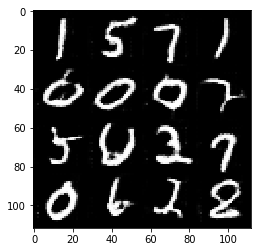

In [12]:
batch_size = 50
z_dim = 100
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

(202599, 28, 28, 3)
(?, 28, 28, 3)
Epoch 1 of 1. Iteration 10
  Discriminator Loss: 0.0373 || Generator Loss: 4.0501
Epoch 1 of 1. Iteration 20
  Discriminator Loss: 0.0466 || Generator Loss: 13.0947
Epoch 1 of 1. Iteration 30
  Discriminator Loss: 0.3516 || Generator Loss: 13.0922
Epoch 1 of 1. Iteration 40
  Discriminator Loss: 2.4722 || Generator Loss: 0.1087
Epoch 1 of 1. Iteration 50
  Discriminator Loss: 0.0126 || Generator Loss: 5.3513
Epoch 1 of 1. Iteration 60
  Discriminator Loss: 0.0221 || Generator Loss: 9.1364
Epoch 1 of 1. Iteration 70
  Discriminator Loss: 0.0230 || Generator Loss: 12.8712
Epoch 1 of 1. Iteration 80
  Discriminator Loss: 0.6839 || Generator Loss: 9.5565
Epoch 1 of 1. Iteration 90
  Discriminator Loss: 1.3194 || Generator Loss: 0.6210
Epoch 1 of 1. Iteration 100
  Discriminator Loss: 1.6223 || Generator Loss: 1.6303
(?, 28, 28, 3)


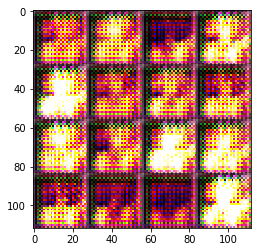

Epoch 1 of 1. Iteration 110
  Discriminator Loss: 1.7109 || Generator Loss: 0.3665
Epoch 1 of 1. Iteration 120
  Discriminator Loss: 0.7103 || Generator Loss: 1.4480
Epoch 1 of 1. Iteration 130
  Discriminator Loss: 1.3559 || Generator Loss: 3.5607
Epoch 1 of 1. Iteration 140
  Discriminator Loss: 0.2856 || Generator Loss: 3.9055
Epoch 1 of 1. Iteration 150
  Discriminator Loss: 0.2473 || Generator Loss: 1.8941
Epoch 1 of 1. Iteration 160
  Discriminator Loss: 1.2056 || Generator Loss: 0.4759
Epoch 1 of 1. Iteration 170
  Discriminator Loss: 0.3977 || Generator Loss: 1.5130
Epoch 1 of 1. Iteration 180
  Discriminator Loss: 0.7462 || Generator Loss: 7.8585
Epoch 1 of 1. Iteration 190
  Discriminator Loss: 0.0958 || Generator Loss: 3.0621
Epoch 1 of 1. Iteration 200
  Discriminator Loss: 0.4430 || Generator Loss: 2.8027
(?, 28, 28, 3)


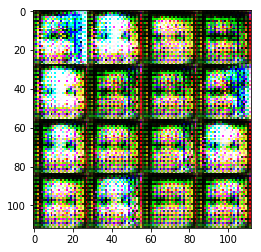

Epoch 1 of 1. Iteration 210
  Discriminator Loss: 0.8534 || Generator Loss: 0.9342
Epoch 1 of 1. Iteration 220
  Discriminator Loss: 1.2524 || Generator Loss: 0.5074
Epoch 1 of 1. Iteration 230
  Discriminator Loss: 0.6858 || Generator Loss: 1.1073
Epoch 1 of 1. Iteration 240
  Discriminator Loss: 0.9586 || Generator Loss: 0.7303
Epoch 1 of 1. Iteration 250
  Discriminator Loss: 0.9577 || Generator Loss: 1.1198
Epoch 1 of 1. Iteration 260
  Discriminator Loss: 0.8865 || Generator Loss: 1.1564
Epoch 1 of 1. Iteration 270
  Discriminator Loss: 1.4309 || Generator Loss: 0.5505
Epoch 1 of 1. Iteration 280
  Discriminator Loss: 1.4799 || Generator Loss: 0.7331
Epoch 1 of 1. Iteration 290
  Discriminator Loss: 1.2922 || Generator Loss: 0.8699
Epoch 1 of 1. Iteration 300
  Discriminator Loss: 1.4141 || Generator Loss: 0.7595
(?, 28, 28, 3)


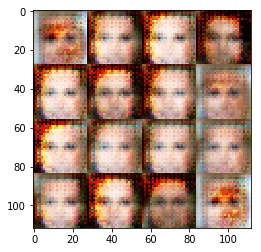

Epoch 1 of 1. Iteration 310
  Discriminator Loss: 1.4094 || Generator Loss: 0.5969
Epoch 1 of 1. Iteration 320
  Discriminator Loss: 0.8077 || Generator Loss: 1.0029
Epoch 1 of 1. Iteration 330
  Discriminator Loss: 0.7654 || Generator Loss: 1.7223
Epoch 1 of 1. Iteration 340
  Discriminator Loss: 0.9257 || Generator Loss: 0.9307
Epoch 1 of 1. Iteration 350
  Discriminator Loss: 1.4211 || Generator Loss: 0.7169
Epoch 1 of 1. Iteration 360
  Discriminator Loss: 1.3377 || Generator Loss: 0.8799
Epoch 1 of 1. Iteration 370
  Discriminator Loss: 1.2537 || Generator Loss: 0.8317
Epoch 1 of 1. Iteration 380
  Discriminator Loss: 1.3439 || Generator Loss: 0.6842
Epoch 1 of 1. Iteration 390
  Discriminator Loss: 1.4130 || Generator Loss: 0.7679
Epoch 1 of 1. Iteration 400
  Discriminator Loss: 1.2442 || Generator Loss: 0.7662
(?, 28, 28, 3)


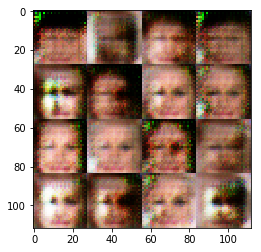

Epoch 1 of 1. Iteration 410
  Discriminator Loss: 1.4763 || Generator Loss: 0.5932
Epoch 1 of 1. Iteration 420
  Discriminator Loss: 1.2780 || Generator Loss: 0.6150
Epoch 1 of 1. Iteration 430
  Discriminator Loss: 1.3692 || Generator Loss: 0.7113
Epoch 1 of 1. Iteration 440
  Discriminator Loss: 1.1740 || Generator Loss: 0.8176
Epoch 1 of 1. Iteration 450
  Discriminator Loss: 1.1727 || Generator Loss: 0.7336
Epoch 1 of 1. Iteration 460
  Discriminator Loss: 1.2852 || Generator Loss: 0.7497
Epoch 1 of 1. Iteration 470
  Discriminator Loss: 1.0465 || Generator Loss: 0.8239
Epoch 1 of 1. Iteration 480
  Discriminator Loss: 1.2766 || Generator Loss: 0.8973
Epoch 1 of 1. Iteration 490
  Discriminator Loss: 1.5235 || Generator Loss: 0.5796
Epoch 1 of 1. Iteration 500
  Discriminator Loss: 1.2832 || Generator Loss: 0.6950
(?, 28, 28, 3)


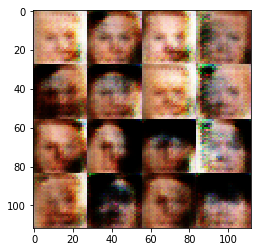

Epoch 1 of 1. Iteration 510
  Discriminator Loss: 1.2559 || Generator Loss: 0.6987
Epoch 1 of 1. Iteration 520
  Discriminator Loss: 1.2730 || Generator Loss: 0.8650
Epoch 1 of 1. Iteration 530
  Discriminator Loss: 1.2113 || Generator Loss: 0.6424
Epoch 1 of 1. Iteration 540
  Discriminator Loss: 1.0616 || Generator Loss: 0.9751
Epoch 1 of 1. Iteration 550
  Discriminator Loss: 1.4219 || Generator Loss: 0.7160
Epoch 1 of 1. Iteration 560
  Discriminator Loss: 0.9127 || Generator Loss: 1.0600
Epoch 1 of 1. Iteration 570
  Discriminator Loss: 1.0911 || Generator Loss: 0.7980
Epoch 1 of 1. Iteration 580
  Discriminator Loss: 1.4731 || Generator Loss: 0.7778
Epoch 1 of 1. Iteration 590
  Discriminator Loss: 1.3284 || Generator Loss: 0.9936
Epoch 1 of 1. Iteration 600
  Discriminator Loss: 1.3736 || Generator Loss: 0.6012
(?, 28, 28, 3)


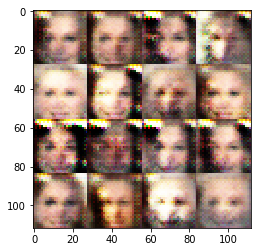

Epoch 1 of 1. Iteration 610
  Discriminator Loss: 1.1759 || Generator Loss: 0.7886
Epoch 1 of 1. Iteration 620
  Discriminator Loss: 1.7681 || Generator Loss: 2.4316
Epoch 1 of 1. Iteration 630
  Discriminator Loss: 1.2521 || Generator Loss: 0.7833
Epoch 1 of 1. Iteration 640
  Discriminator Loss: 1.1078 || Generator Loss: 0.7744
Epoch 1 of 1. Iteration 650
  Discriminator Loss: 1.6717 || Generator Loss: 0.6244
Epoch 1 of 1. Iteration 660
  Discriminator Loss: 1.1439 || Generator Loss: 0.8314
Epoch 1 of 1. Iteration 670
  Discriminator Loss: 1.4120 || Generator Loss: 0.4957
Epoch 1 of 1. Iteration 680
  Discriminator Loss: 1.1157 || Generator Loss: 0.7004
Epoch 1 of 1. Iteration 690
  Discriminator Loss: 1.4045 || Generator Loss: 0.8496
Epoch 1 of 1. Iteration 700
  Discriminator Loss: 1.1516 || Generator Loss: 0.8076
(?, 28, 28, 3)


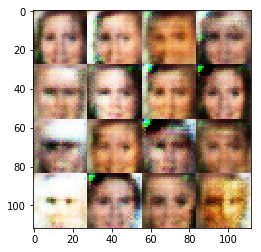

Epoch 1 of 1. Iteration 710
  Discriminator Loss: 1.2843 || Generator Loss: 0.7211
Epoch 1 of 1. Iteration 720
  Discriminator Loss: 1.2818 || Generator Loss: 0.6851
Epoch 1 of 1. Iteration 730
  Discriminator Loss: 1.2881 || Generator Loss: 0.6510
Epoch 1 of 1. Iteration 740
  Discriminator Loss: 1.3944 || Generator Loss: 0.8245
Epoch 1 of 1. Iteration 750
  Discriminator Loss: 1.4334 || Generator Loss: 0.6065
Epoch 1 of 1. Iteration 760
  Discriminator Loss: 1.1949 || Generator Loss: 0.9908
Epoch 1 of 1. Iteration 770
  Discriminator Loss: 1.4890 || Generator Loss: 0.6458
Epoch 1 of 1. Iteration 780
  Discriminator Loss: 1.0147 || Generator Loss: 1.0194
Epoch 1 of 1. Iteration 790
  Discriminator Loss: 1.5067 || Generator Loss: 0.4726
Epoch 1 of 1. Iteration 800
  Discriminator Loss: 1.3779 || Generator Loss: 0.7585
(?, 28, 28, 3)


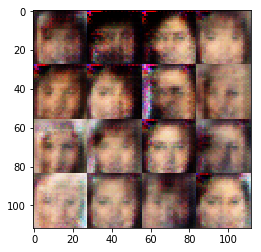

Epoch 1 of 1. Iteration 810
  Discriminator Loss: 1.4571 || Generator Loss: 0.6335
Epoch 1 of 1. Iteration 820
  Discriminator Loss: 1.3581 || Generator Loss: 0.6129
Epoch 1 of 1. Iteration 830
  Discriminator Loss: 1.0981 || Generator Loss: 1.1281
Epoch 1 of 1. Iteration 840
  Discriminator Loss: 1.3787 || Generator Loss: 0.5779
Epoch 1 of 1. Iteration 850
  Discriminator Loss: 1.3633 || Generator Loss: 0.5858
Epoch 1 of 1. Iteration 860
  Discriminator Loss: 1.2102 || Generator Loss: 0.8584
Epoch 1 of 1. Iteration 870
  Discriminator Loss: 1.0600 || Generator Loss: 0.7302
Epoch 1 of 1. Iteration 880
  Discriminator Loss: 1.4707 || Generator Loss: 0.4200
Epoch 1 of 1. Iteration 890
  Discriminator Loss: 1.1841 || Generator Loss: 0.7451
Epoch 1 of 1. Iteration 900
  Discriminator Loss: 1.4752 || Generator Loss: 0.8044
(?, 28, 28, 3)


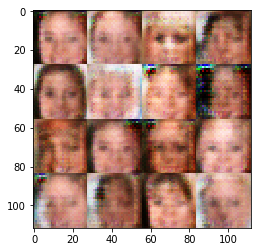

Epoch 1 of 1. Iteration 910
  Discriminator Loss: 1.4864 || Generator Loss: 1.1355
Epoch 1 of 1. Iteration 920
  Discriminator Loss: 1.2267 || Generator Loss: 0.8135
Epoch 1 of 1. Iteration 930
  Discriminator Loss: 1.3036 || Generator Loss: 0.7416
Epoch 1 of 1. Iteration 940
  Discriminator Loss: 0.9854 || Generator Loss: 0.7412
Epoch 1 of 1. Iteration 950
  Discriminator Loss: 1.2693 || Generator Loss: 0.7577
Epoch 1 of 1. Iteration 960
  Discriminator Loss: 1.2218 || Generator Loss: 0.6775
Epoch 1 of 1. Iteration 970
  Discriminator Loss: 1.1552 || Generator Loss: 0.8802
Epoch 1 of 1. Iteration 980
  Discriminator Loss: 1.1959 || Generator Loss: 0.6342
Epoch 1 of 1. Iteration 990
  Discriminator Loss: 1.1059 || Generator Loss: 0.8270
Epoch 1 of 1. Iteration 1000
  Discriminator Loss: 1.2697 || Generator Loss: 1.0975
(?, 28, 28, 3)


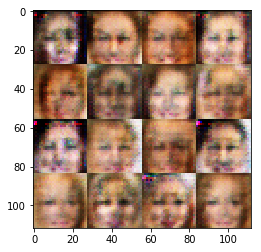

Epoch 1 of 1. Iteration 1010
  Discriminator Loss: 1.2753 || Generator Loss: 0.8179
Epoch 1 of 1. Iteration 1020
  Discriminator Loss: 1.1854 || Generator Loss: 0.7024
Epoch 1 of 1. Iteration 1030
  Discriminator Loss: 1.4276 || Generator Loss: 0.5333
Epoch 1 of 1. Iteration 1040
  Discriminator Loss: 1.1106 || Generator Loss: 0.6374
Epoch 1 of 1. Iteration 1050
  Discriminator Loss: 1.3133 || Generator Loss: 0.7623
Epoch 1 of 1. Iteration 1060
  Discriminator Loss: 1.4599 || Generator Loss: 0.7857
Epoch 1 of 1. Iteration 1070
  Discriminator Loss: 1.1752 || Generator Loss: 0.7407
Epoch 1 of 1. Iteration 1080
  Discriminator Loss: 1.1444 || Generator Loss: 0.7380
Epoch 1 of 1. Iteration 1090
  Discriminator Loss: 1.2856 || Generator Loss: 0.7156
Epoch 1 of 1. Iteration 1100
  Discriminator Loss: 1.2676 || Generator Loss: 0.7493
(?, 28, 28, 3)


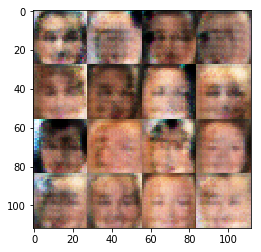

Epoch 1 of 1. Iteration 1110
  Discriminator Loss: 1.5655 || Generator Loss: 0.4961
Epoch 1 of 1. Iteration 1120
  Discriminator Loss: 1.2742 || Generator Loss: 0.8334
Epoch 1 of 1. Iteration 1130
  Discriminator Loss: 1.3664 || Generator Loss: 1.0330
Epoch 1 of 1. Iteration 1140
  Discriminator Loss: 1.3680 || Generator Loss: 0.7904
Epoch 1 of 1. Iteration 1150
  Discriminator Loss: 1.3657 || Generator Loss: 0.6179
Epoch 1 of 1. Iteration 1160
  Discriminator Loss: 1.4573 || Generator Loss: 0.6024
Epoch 1 of 1. Iteration 1170
  Discriminator Loss: 1.4199 || Generator Loss: 0.6390
Epoch 1 of 1. Iteration 1180
  Discriminator Loss: 1.3536 || Generator Loss: 0.6404
Epoch 1 of 1. Iteration 1190
  Discriminator Loss: 1.2832 || Generator Loss: 0.5527
Epoch 1 of 1. Iteration 1200
  Discriminator Loss: 1.3425 || Generator Loss: 0.9390
(?, 28, 28, 3)


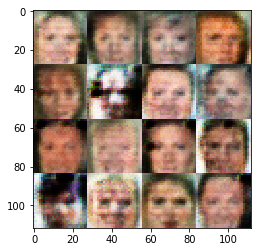

Epoch 1 of 1. Iteration 1210
  Discriminator Loss: 1.3803 || Generator Loss: 0.7242
Epoch 1 of 1. Iteration 1220
  Discriminator Loss: 1.4373 || Generator Loss: 0.6687
Epoch 1 of 1. Iteration 1230
  Discriminator Loss: 1.2794 || Generator Loss: 0.8568
Epoch 1 of 1. Iteration 1240
  Discriminator Loss: 1.3159 || Generator Loss: 0.7375
Epoch 1 of 1. Iteration 1250
  Discriminator Loss: 1.2417 || Generator Loss: 0.7987
Epoch 1 of 1. Iteration 1260
  Discriminator Loss: 1.1985 || Generator Loss: 0.9953
Epoch 1 of 1. Iteration 1270
  Discriminator Loss: 1.2402 || Generator Loss: 0.7290
Epoch 1 of 1. Iteration 1280
  Discriminator Loss: 1.3313 || Generator Loss: 0.7185
Epoch 1 of 1. Iteration 1290
  Discriminator Loss: 1.1318 || Generator Loss: 0.8961
Epoch 1 of 1. Iteration 1300
  Discriminator Loss: 1.3796 || Generator Loss: 0.5444
(?, 28, 28, 3)


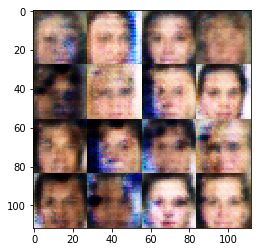

Epoch 1 of 1. Iteration 1310
  Discriminator Loss: 1.4465 || Generator Loss: 0.5810
Epoch 1 of 1. Iteration 1320
  Discriminator Loss: 1.3382 || Generator Loss: 0.6332
Epoch 1 of 1. Iteration 1330
  Discriminator Loss: 1.2567 || Generator Loss: 0.7999
Epoch 1 of 1. Iteration 1340
  Discriminator Loss: 1.0470 || Generator Loss: 0.7862
Epoch 1 of 1. Iteration 1350
  Discriminator Loss: 0.6828 || Generator Loss: 1.1490
Epoch 1 of 1. Iteration 1360
  Discriminator Loss: 0.6411 || Generator Loss: 2.0259
Epoch 1 of 1. Iteration 1370
  Discriminator Loss: 1.3857 || Generator Loss: 0.4379
Epoch 1 of 1. Iteration 1380
  Discriminator Loss: 1.3737 || Generator Loss: 1.0722
Epoch 1 of 1. Iteration 1390
  Discriminator Loss: 1.2330 || Generator Loss: 0.9236
Epoch 1 of 1. Iteration 1400
  Discriminator Loss: 1.1624 || Generator Loss: 0.8399
(?, 28, 28, 3)


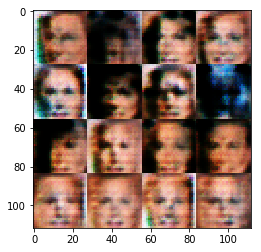

Epoch 1 of 1. Iteration 1410
  Discriminator Loss: 1.2645 || Generator Loss: 0.5120
Epoch 1 of 1. Iteration 1420
  Discriminator Loss: 1.2212 || Generator Loss: 0.8375
Epoch 1 of 1. Iteration 1430
  Discriminator Loss: 1.3452 || Generator Loss: 0.7765
Epoch 1 of 1. Iteration 1440
  Discriminator Loss: 1.2729 || Generator Loss: 0.7287
Epoch 1 of 1. Iteration 1450
  Discriminator Loss: 1.4258 || Generator Loss: 0.4624
Epoch 1 of 1. Iteration 1460
  Discriminator Loss: 1.1630 || Generator Loss: 0.8077
Epoch 1 of 1. Iteration 1470
  Discriminator Loss: 1.5656 || Generator Loss: 0.5130
Epoch 1 of 1. Iteration 1480
  Discriminator Loss: 1.3181 || Generator Loss: 0.7419
Epoch 1 of 1. Iteration 1490
  Discriminator Loss: 1.1280 || Generator Loss: 0.7836
Epoch 1 of 1. Iteration 1500
  Discriminator Loss: 1.2384 || Generator Loss: 0.6184
(?, 28, 28, 3)


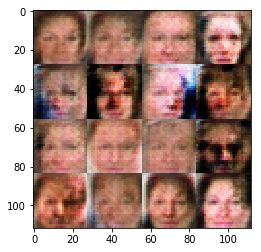

Epoch 1 of 1. Iteration 1510
  Discriminator Loss: 1.2627 || Generator Loss: 0.4304
Epoch 1 of 1. Iteration 1520
  Discriminator Loss: 1.0890 || Generator Loss: 1.0583
Epoch 1 of 1. Iteration 1530
  Discriminator Loss: 1.1664 || Generator Loss: 1.0190
Epoch 1 of 1. Iteration 1540
  Discriminator Loss: 1.2837 || Generator Loss: 0.7645
Epoch 1 of 1. Iteration 1550
  Discriminator Loss: 1.3283 || Generator Loss: 0.6807
Epoch 1 of 1. Iteration 1560
  Discriminator Loss: 1.3414 || Generator Loss: 0.5479
Epoch 1 of 1. Iteration 1570
  Discriminator Loss: 1.3090 || Generator Loss: 0.5791
Epoch 1 of 1. Iteration 1580
  Discriminator Loss: 1.3358 || Generator Loss: 0.7011
Epoch 1 of 1. Iteration 1590
  Discriminator Loss: 1.2462 || Generator Loss: 1.0095
Epoch 1 of 1. Iteration 1600
  Discriminator Loss: 1.3229 || Generator Loss: 0.5516
(?, 28, 28, 3)


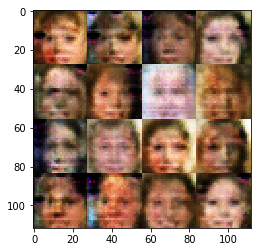

Epoch 1 of 1. Iteration 1610
  Discriminator Loss: 1.3197 || Generator Loss: 0.8905
Epoch 1 of 1. Iteration 1620
  Discriminator Loss: 1.4038 || Generator Loss: 0.5652
Epoch 1 of 1. Iteration 1630
  Discriminator Loss: 1.2722 || Generator Loss: 0.6849
Epoch 1 of 1. Iteration 1640
  Discriminator Loss: 1.2680 || Generator Loss: 0.6788
Epoch 1 of 1. Iteration 1650
  Discriminator Loss: 1.5156 || Generator Loss: 0.4202
Epoch 1 of 1. Iteration 1660
  Discriminator Loss: 1.4394 || Generator Loss: 0.5859
Epoch 1 of 1. Iteration 1670
  Discriminator Loss: 1.3076 || Generator Loss: 0.7152
Epoch 1 of 1. Iteration 1680
  Discriminator Loss: 1.2284 || Generator Loss: 0.8325
Epoch 1 of 1. Iteration 1690
  Discriminator Loss: 1.2744 || Generator Loss: 0.7177
Epoch 1 of 1. Iteration 1700
  Discriminator Loss: 1.4765 || Generator Loss: 0.6499
(?, 28, 28, 3)


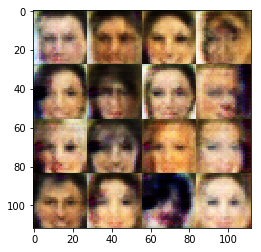

Epoch 1 of 1. Iteration 1710
  Discriminator Loss: 1.3966 || Generator Loss: 0.4540
Epoch 1 of 1. Iteration 1720
  Discriminator Loss: 1.4498 || Generator Loss: 0.5813
Epoch 1 of 1. Iteration 1730
  Discriminator Loss: 1.3104 || Generator Loss: 0.6649
Epoch 1 of 1. Iteration 1740
  Discriminator Loss: 1.3734 || Generator Loss: 0.5792
Epoch 1 of 1. Iteration 1750
  Discriminator Loss: 1.2665 || Generator Loss: 0.7037
Epoch 1 of 1. Iteration 1760
  Discriminator Loss: 1.0586 || Generator Loss: 1.8218
Epoch 1 of 1. Iteration 1770
  Discriminator Loss: 1.1498 || Generator Loss: 1.2926
Epoch 1 of 1. Iteration 1780
  Discriminator Loss: 1.2790 || Generator Loss: 0.7409
Epoch 1 of 1. Iteration 1790
  Discriminator Loss: 1.3089 || Generator Loss: 0.6104
Epoch 1 of 1. Iteration 1800
  Discriminator Loss: 1.1350 || Generator Loss: 0.8068
(?, 28, 28, 3)


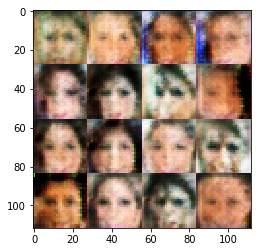

Epoch 1 of 1. Iteration 1810
  Discriminator Loss: 1.4413 || Generator Loss: 0.7024
Epoch 1 of 1. Iteration 1820
  Discriminator Loss: 1.3096 || Generator Loss: 0.6513
Epoch 1 of 1. Iteration 1830
  Discriminator Loss: 1.3211 || Generator Loss: 0.7320
Epoch 1 of 1. Iteration 1840
  Discriminator Loss: 1.2468 || Generator Loss: 0.8198
Epoch 1 of 1. Iteration 1850
  Discriminator Loss: 1.4426 || Generator Loss: 0.4528
Epoch 1 of 1. Iteration 1860
  Discriminator Loss: 1.2293 || Generator Loss: 0.7066
Epoch 1 of 1. Iteration 1870
  Discriminator Loss: 1.1584 || Generator Loss: 0.7561
Epoch 1 of 1. Iteration 1880
  Discriminator Loss: 1.2885 || Generator Loss: 0.7218
Epoch 1 of 1. Iteration 1890
  Discriminator Loss: 1.1257 || Generator Loss: 0.9221
Epoch 1 of 1. Iteration 1900
  Discriminator Loss: 1.5044 || Generator Loss: 0.4672
(?, 28, 28, 3)


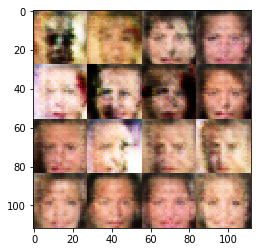

Epoch 1 of 1. Iteration 1910
  Discriminator Loss: 1.1197 || Generator Loss: 0.8435
Epoch 1 of 1. Iteration 1920
  Discriminator Loss: 1.1683 || Generator Loss: 1.0545
Epoch 1 of 1. Iteration 1930
  Discriminator Loss: 1.5169 || Generator Loss: 0.4771
Epoch 1 of 1. Iteration 1940
  Discriminator Loss: 1.4639 || Generator Loss: 0.6227
Epoch 1 of 1. Iteration 1950
  Discriminator Loss: 1.2654 || Generator Loss: 0.7311
Epoch 1 of 1. Iteration 1960
  Discriminator Loss: 1.4051 || Generator Loss: 0.6266
Epoch 1 of 1. Iteration 1970
  Discriminator Loss: 1.4082 || Generator Loss: 0.5516
Epoch 1 of 1. Iteration 1980
  Discriminator Loss: 1.2882 || Generator Loss: 0.6402
Epoch 1 of 1. Iteration 1990
  Discriminator Loss: 1.2440 || Generator Loss: 0.7208
Epoch 1 of 1. Iteration 2000
  Discriminator Loss: 1.3756 || Generator Loss: 0.6194
(?, 28, 28, 3)


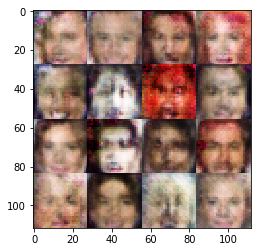

Epoch 1 of 1. Iteration 2010
  Discriminator Loss: 1.3801 || Generator Loss: 0.7027
Epoch 1 of 1. Iteration 2020
  Discriminator Loss: 1.2950 || Generator Loss: 0.6724
Epoch 1 of 1. Iteration 2030
  Discriminator Loss: 1.2515 || Generator Loss: 1.1882
Epoch 1 of 1. Iteration 2040
  Discriminator Loss: 1.3425 || Generator Loss: 0.6994
Epoch 1 of 1. Iteration 2050
  Discriminator Loss: 1.1498 || Generator Loss: 0.8524
Epoch 1 of 1. Iteration 2060
  Discriminator Loss: 1.5305 || Generator Loss: 0.3199
Epoch 1 of 1. Iteration 2070
  Discriminator Loss: 1.3848 || Generator Loss: 0.6508
Epoch 1 of 1. Iteration 2080
  Discriminator Loss: 0.9817 || Generator Loss: 0.8658
Epoch 1 of 1. Iteration 2090
  Discriminator Loss: 1.3762 || Generator Loss: 0.6525
Epoch 1 of 1. Iteration 2100
  Discriminator Loss: 2.0538 || Generator Loss: 0.1976
(?, 28, 28, 3)


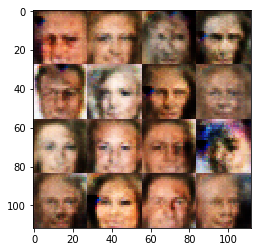

Epoch 1 of 1. Iteration 2110
  Discriminator Loss: 1.5427 || Generator Loss: 0.4868
Epoch 1 of 1. Iteration 2120
  Discriminator Loss: 1.2940 || Generator Loss: 0.8551
Epoch 1 of 1. Iteration 2130
  Discriminator Loss: 1.3709 || Generator Loss: 0.6766
Epoch 1 of 1. Iteration 2140
  Discriminator Loss: 1.2938 || Generator Loss: 0.5720
Epoch 1 of 1. Iteration 2150
  Discriminator Loss: 1.3616 || Generator Loss: 0.6334
Epoch 1 of 1. Iteration 2160
  Discriminator Loss: 1.0566 || Generator Loss: 0.9358
Epoch 1 of 1. Iteration 2170
  Discriminator Loss: 1.3194 || Generator Loss: 0.6089
Epoch 1 of 1. Iteration 2180
  Discriminator Loss: 1.5324 || Generator Loss: 0.8132
Epoch 1 of 1. Iteration 2190
  Discriminator Loss: 1.3084 || Generator Loss: 0.8953
Epoch 1 of 1. Iteration 2200
  Discriminator Loss: 1.4015 || Generator Loss: 0.5930
(?, 28, 28, 3)


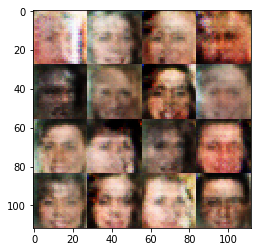

Epoch 1 of 1. Iteration 2210
  Discriminator Loss: 1.2745 || Generator Loss: 0.7564
Epoch 1 of 1. Iteration 2220
  Discriminator Loss: 1.0579 || Generator Loss: 0.9669
Epoch 1 of 1. Iteration 2230
  Discriminator Loss: 1.2069 || Generator Loss: 0.8717
Epoch 1 of 1. Iteration 2240
  Discriminator Loss: 1.3485 || Generator Loss: 0.6025
Epoch 1 of 1. Iteration 2250
  Discriminator Loss: 1.2684 || Generator Loss: 0.6305
Epoch 1 of 1. Iteration 2260
  Discriminator Loss: 1.2916 || Generator Loss: 0.7060
Epoch 1 of 1. Iteration 2270
  Discriminator Loss: 1.1154 || Generator Loss: 0.8832
Epoch 1 of 1. Iteration 2280
  Discriminator Loss: 1.2273 || Generator Loss: 0.7037
Epoch 1 of 1. Iteration 2290
  Discriminator Loss: 1.2860 || Generator Loss: 0.6920
Epoch 1 of 1. Iteration 2300
  Discriminator Loss: 1.3001 || Generator Loss: 0.6511
(?, 28, 28, 3)


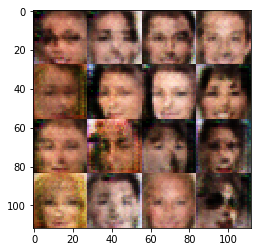

Epoch 1 of 1. Iteration 2310
  Discriminator Loss: 1.3983 || Generator Loss: 0.3874
Epoch 1 of 1. Iteration 2320
  Discriminator Loss: 1.3052 || Generator Loss: 0.5204
Epoch 1 of 1. Iteration 2330
  Discriminator Loss: 1.4405 || Generator Loss: 0.6514
Epoch 1 of 1. Iteration 2340
  Discriminator Loss: 1.3649 || Generator Loss: 0.6025
Epoch 1 of 1. Iteration 2350
  Discriminator Loss: 1.3597 || Generator Loss: 0.6376
Epoch 1 of 1. Iteration 2360
  Discriminator Loss: 1.3592 || Generator Loss: 0.7044
Epoch 1 of 1. Iteration 2370
  Discriminator Loss: 1.4439 || Generator Loss: 0.5431
Epoch 1 of 1. Iteration 2380
  Discriminator Loss: 1.3788 || Generator Loss: 0.5596
Epoch 1 of 1. Iteration 2390
  Discriminator Loss: 1.2323 || Generator Loss: 0.7507
Epoch 1 of 1. Iteration 2400
  Discriminator Loss: 1.2843 || Generator Loss: 0.5853
(?, 28, 28, 3)


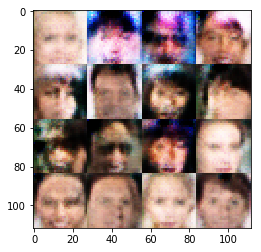

Epoch 1 of 1. Iteration 2410
  Discriminator Loss: 1.3440 || Generator Loss: 0.6974
Epoch 1 of 1. Iteration 2420
  Discriminator Loss: 1.3989 || Generator Loss: 0.7891
Epoch 1 of 1. Iteration 2430
  Discriminator Loss: 1.4564 || Generator Loss: 0.5987
Epoch 1 of 1. Iteration 2440
  Discriminator Loss: 1.2368 || Generator Loss: 0.9201
Epoch 1 of 1. Iteration 2450
  Discriminator Loss: 1.3417 || Generator Loss: 0.6950
Epoch 1 of 1. Iteration 2460
  Discriminator Loss: 1.0985 || Generator Loss: 1.0545
Epoch 1 of 1. Iteration 2470
  Discriminator Loss: 1.2758 || Generator Loss: 0.6368
Epoch 1 of 1. Iteration 2480
  Discriminator Loss: 1.2563 || Generator Loss: 0.6744
Epoch 1 of 1. Iteration 2490
  Discriminator Loss: 1.2920 || Generator Loss: 0.7098
Epoch 1 of 1. Iteration 2500
  Discriminator Loss: 1.2472 || Generator Loss: 0.6804
(?, 28, 28, 3)


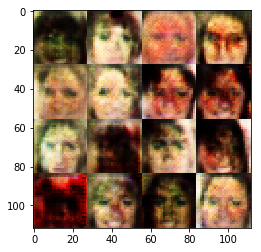

Epoch 1 of 1. Iteration 2510
  Discriminator Loss: 1.3087 || Generator Loss: 0.6924
Epoch 1 of 1. Iteration 2520
  Discriminator Loss: 1.1509 || Generator Loss: 0.7679
Epoch 1 of 1. Iteration 2530
  Discriminator Loss: 1.3903 || Generator Loss: 0.8126
Epoch 1 of 1. Iteration 2540
  Discriminator Loss: 1.3998 || Generator Loss: 0.5360
Epoch 1 of 1. Iteration 2550
  Discriminator Loss: 1.2946 || Generator Loss: 0.6564
Epoch 1 of 1. Iteration 2560
  Discriminator Loss: 1.4288 || Generator Loss: 0.5516
Epoch 1 of 1. Iteration 2570
  Discriminator Loss: 0.9292 || Generator Loss: 0.9952
Epoch 1 of 1. Iteration 2580
  Discriminator Loss: 1.4569 || Generator Loss: 0.5283
Epoch 1 of 1. Iteration 2590
  Discriminator Loss: 1.1080 || Generator Loss: 0.7878
Epoch 1 of 1. Iteration 2600
  Discriminator Loss: 1.2597 || Generator Loss: 0.7281
(?, 28, 28, 3)


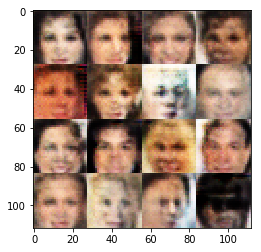

Epoch 1 of 1. Iteration 2610
  Discriminator Loss: 1.1815 || Generator Loss: 0.8006
Epoch 1 of 1. Iteration 2620
  Discriminator Loss: 1.3472 || Generator Loss: 0.6094
Epoch 1 of 1. Iteration 2630
  Discriminator Loss: 1.4581 || Generator Loss: 0.5434
Epoch 1 of 1. Iteration 2640
  Discriminator Loss: 1.4212 || Generator Loss: 0.6130
Epoch 1 of 1. Iteration 2650
  Discriminator Loss: 1.4811 || Generator Loss: 0.5280
Epoch 1 of 1. Iteration 2660
  Discriminator Loss: 1.4538 || Generator Loss: 0.5635
Epoch 1 of 1. Iteration 2670
  Discriminator Loss: 1.5710 || Generator Loss: 0.4896
Epoch 1 of 1. Iteration 2680
  Discriminator Loss: 1.3452 || Generator Loss: 0.6561
Epoch 1 of 1. Iteration 2690
  Discriminator Loss: 1.3762 || Generator Loss: 0.7707
Epoch 1 of 1. Iteration 2700
  Discriminator Loss: 1.3168 || Generator Loss: 0.6317
(?, 28, 28, 3)


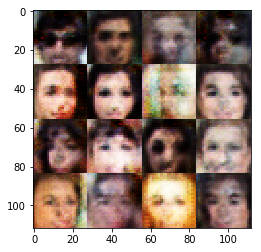

Epoch 1 of 1. Iteration 2710
  Discriminator Loss: 1.3571 || Generator Loss: 0.5632
Epoch 1 of 1. Iteration 2720
  Discriminator Loss: 1.2956 || Generator Loss: 0.6654
Epoch 1 of 1. Iteration 2730
  Discriminator Loss: 1.3384 || Generator Loss: 0.5356
Epoch 1 of 1. Iteration 2740
  Discriminator Loss: 1.3015 || Generator Loss: 0.8080
Epoch 1 of 1. Iteration 2750
  Discriminator Loss: 1.2370 || Generator Loss: 0.7551
Epoch 1 of 1. Iteration 2760
  Discriminator Loss: 1.2227 || Generator Loss: 0.7888
Epoch 1 of 1. Iteration 2770
  Discriminator Loss: 1.1815 || Generator Loss: 0.8694
Epoch 1 of 1. Iteration 2780
  Discriminator Loss: 1.2195 || Generator Loss: 0.7255
Epoch 1 of 1. Iteration 2790
  Discriminator Loss: 1.2944 || Generator Loss: 0.5683
Epoch 1 of 1. Iteration 2800
  Discriminator Loss: 1.0677 || Generator Loss: 0.9147
(?, 28, 28, 3)


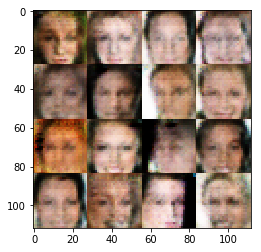

Epoch 1 of 1. Iteration 2810
  Discriminator Loss: 1.2587 || Generator Loss: 0.6199
Epoch 1 of 1. Iteration 2820
  Discriminator Loss: 1.3296 || Generator Loss: 0.6899
Epoch 1 of 1. Iteration 2830
  Discriminator Loss: 1.0608 || Generator Loss: 0.8962
Epoch 1 of 1. Iteration 2840
  Discriminator Loss: 1.3440 || Generator Loss: 0.8158
Epoch 1 of 1. Iteration 2850
  Discriminator Loss: 1.3324 || Generator Loss: 0.6058
Epoch 1 of 1. Iteration 2860
  Discriminator Loss: 1.5471 || Generator Loss: 0.3746
Epoch 1 of 1. Iteration 2870
  Discriminator Loss: 1.3989 || Generator Loss: 0.6145
Epoch 1 of 1. Iteration 2880
  Discriminator Loss: 1.2390 || Generator Loss: 0.9511
Epoch 1 of 1. Iteration 2890
  Discriminator Loss: 1.3977 || Generator Loss: 0.6630
Epoch 1 of 1. Iteration 2900
  Discriminator Loss: 1.2018 || Generator Loss: 0.7628
(?, 28, 28, 3)


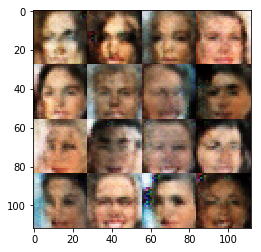

Epoch 1 of 1. Iteration 2910
  Discriminator Loss: 1.2566 || Generator Loss: 0.7732
Epoch 1 of 1. Iteration 2920
  Discriminator Loss: 1.3700 || Generator Loss: 0.6676
Epoch 1 of 1. Iteration 2930
  Discriminator Loss: 1.2779 || Generator Loss: 0.5815
Epoch 1 of 1. Iteration 2940
  Discriminator Loss: 1.4546 || Generator Loss: 0.5621
Epoch 1 of 1. Iteration 2950
  Discriminator Loss: 1.2249 || Generator Loss: 0.7251
Epoch 1 of 1. Iteration 2960
  Discriminator Loss: 1.3234 || Generator Loss: 0.6878
Epoch 1 of 1. Iteration 2970
  Discriminator Loss: 1.1653 || Generator Loss: 0.7849
Epoch 1 of 1. Iteration 2980
  Discriminator Loss: 1.3912 || Generator Loss: 0.6547
Epoch 1 of 1. Iteration 2990
  Discriminator Loss: 1.2180 || Generator Loss: 0.8454
Epoch 1 of 1. Iteration 3000
  Discriminator Loss: 1.3009 || Generator Loss: 0.6318
(?, 28, 28, 3)


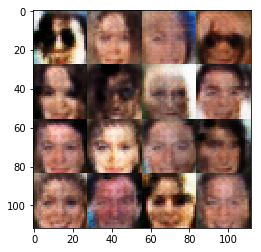

Epoch 1 of 1. Iteration 3010
  Discriminator Loss: 1.3936 || Generator Loss: 0.5628
Epoch 1 of 1. Iteration 3020
  Discriminator Loss: 1.4485 || Generator Loss: 0.5584
Epoch 1 of 1. Iteration 3030
  Discriminator Loss: 1.3034 || Generator Loss: 0.7005
Epoch 1 of 1. Iteration 3040
  Discriminator Loss: 1.3259 || Generator Loss: 0.7139
Epoch 1 of 1. Iteration 3050
  Discriminator Loss: 1.2731 || Generator Loss: 0.6654
Epoch 1 of 1. Iteration 3060
  Discriminator Loss: 1.4440 || Generator Loss: 0.6245
Epoch 1 of 1. Iteration 3070
  Discriminator Loss: 1.2340 || Generator Loss: 0.6715
Epoch 1 of 1. Iteration 3080
  Discriminator Loss: 1.2481 || Generator Loss: 0.7011
Epoch 1 of 1. Iteration 3090
  Discriminator Loss: 1.2676 || Generator Loss: 0.7163
Epoch 1 of 1. Iteration 3100
  Discriminator Loss: 1.4424 || Generator Loss: 0.6075
(?, 28, 28, 3)


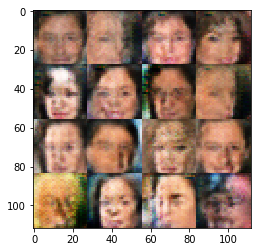

Epoch 1 of 1. Iteration 3110
  Discriminator Loss: 1.3009 || Generator Loss: 0.7167
Epoch 1 of 1. Iteration 3120
  Discriminator Loss: 1.4293 || Generator Loss: 0.6034
Epoch 1 of 1. Iteration 3130
  Discriminator Loss: 1.3112 || Generator Loss: 0.6984
Epoch 1 of 1. Iteration 3140
  Discriminator Loss: 1.2908 || Generator Loss: 0.5938
Epoch 1 of 1. Iteration 3150
  Discriminator Loss: 1.4868 || Generator Loss: 0.5392
Epoch 1 of 1. Iteration 3160
  Discriminator Loss: 1.2749 || Generator Loss: 0.7103
Epoch 1 of 1. Iteration 3170
  Discriminator Loss: 1.3523 || Generator Loss: 0.6230
Epoch 1 of 1. Iteration 3180
  Discriminator Loss: 1.3491 || Generator Loss: 0.7380
Epoch 1 of 1. Iteration 3190
  Discriminator Loss: 1.3804 || Generator Loss: 0.6820
Epoch 1 of 1. Iteration 3200
  Discriminator Loss: 1.2144 || Generator Loss: 0.7460
(?, 28, 28, 3)


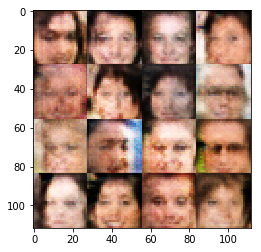

Epoch 1 of 1. Iteration 3210
  Discriminator Loss: 1.1980 || Generator Loss: 0.7127
Epoch 1 of 1. Iteration 3220
  Discriminator Loss: 1.3328 || Generator Loss: 0.6809
Epoch 1 of 1. Iteration 3230
  Discriminator Loss: 1.3766 || Generator Loss: 0.6425
Epoch 1 of 1. Iteration 3240
  Discriminator Loss: 1.2972 || Generator Loss: 0.7134
Epoch 1 of 1. Iteration 3250
  Discriminator Loss: 1.2827 || Generator Loss: 0.7663
Epoch 1 of 1. Iteration 3260
  Discriminator Loss: 1.3565 || Generator Loss: 0.6625
Epoch 1 of 1. Iteration 3270
  Discriminator Loss: 1.2724 || Generator Loss: 0.7213
Epoch 1 of 1. Iteration 3280
  Discriminator Loss: 1.3351 || Generator Loss: 0.7236
Epoch 1 of 1. Iteration 3290
  Discriminator Loss: 1.3725 || Generator Loss: 0.5964
Epoch 1 of 1. Iteration 3300
  Discriminator Loss: 1.4195 || Generator Loss: 0.6064
(?, 28, 28, 3)


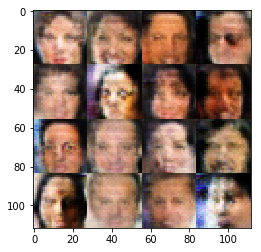

Epoch 1 of 1. Iteration 3310
  Discriminator Loss: 1.2341 || Generator Loss: 0.7953
Epoch 1 of 1. Iteration 3320
  Discriminator Loss: 1.4572 || Generator Loss: 0.5942
Epoch 1 of 1. Iteration 3330
  Discriminator Loss: 1.4812 || Generator Loss: 0.6066
Epoch 1 of 1. Iteration 3340
  Discriminator Loss: 1.3200 || Generator Loss: 0.6381
Epoch 1 of 1. Iteration 3350
  Discriminator Loss: 1.2703 || Generator Loss: 0.7691
Epoch 1 of 1. Iteration 3360
  Discriminator Loss: 1.2241 || Generator Loss: 0.7437
Epoch 1 of 1. Iteration 3370
  Discriminator Loss: 1.4028 || Generator Loss: 0.6209
Epoch 1 of 1. Iteration 3380
  Discriminator Loss: 1.3224 || Generator Loss: 0.6902
Epoch 1 of 1. Iteration 3390
  Discriminator Loss: 1.3468 || Generator Loss: 0.7158
Epoch 1 of 1. Iteration 3400
  Discriminator Loss: 1.4155 || Generator Loss: 0.6971
(?, 28, 28, 3)


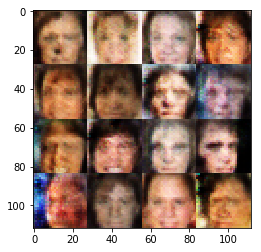

Epoch 1 of 1. Iteration 3410
  Discriminator Loss: 1.3073 || Generator Loss: 0.6535
Epoch 1 of 1. Iteration 3420
  Discriminator Loss: 1.3692 || Generator Loss: 0.6225
Epoch 1 of 1. Iteration 3430
  Discriminator Loss: 1.3441 || Generator Loss: 0.6925
Epoch 1 of 1. Iteration 3440
  Discriminator Loss: 1.2820 || Generator Loss: 0.7580
Epoch 1 of 1. Iteration 3450
  Discriminator Loss: 1.2350 || Generator Loss: 0.7458
Epoch 1 of 1. Iteration 3460
  Discriminator Loss: 1.2616 || Generator Loss: 0.7725
Epoch 1 of 1. Iteration 3470
  Discriminator Loss: 1.2781 || Generator Loss: 0.6865
Epoch 1 of 1. Iteration 3480
  Discriminator Loss: 1.3968 || Generator Loss: 0.6239
Epoch 1 of 1. Iteration 3490
  Discriminator Loss: 1.2832 || Generator Loss: 0.7109
Epoch 1 of 1. Iteration 3500
  Discriminator Loss: 1.4252 || Generator Loss: 0.5530
(?, 28, 28, 3)


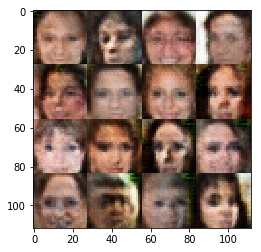

Epoch 1 of 1. Iteration 3510
  Discriminator Loss: 1.2457 || Generator Loss: 0.8124
Epoch 1 of 1. Iteration 3520
  Discriminator Loss: 1.3870 || Generator Loss: 0.6254
Epoch 1 of 1. Iteration 3530
  Discriminator Loss: 1.4033 || Generator Loss: 0.6787
Epoch 1 of 1. Iteration 3540
  Discriminator Loss: 1.3931 || Generator Loss: 0.6683
Epoch 1 of 1. Iteration 3550
  Discriminator Loss: 1.1934 || Generator Loss: 0.7796
Epoch 1 of 1. Iteration 3560
  Discriminator Loss: 1.3585 || Generator Loss: 0.6077
Epoch 1 of 1. Iteration 3570
  Discriminator Loss: 1.2873 || Generator Loss: 0.6759
Epoch 1 of 1. Iteration 3580
  Discriminator Loss: 1.1438 || Generator Loss: 0.7779
Epoch 1 of 1. Iteration 3590
  Discriminator Loss: 1.2577 || Generator Loss: 0.7468
Epoch 1 of 1. Iteration 3600
  Discriminator Loss: 1.2821 || Generator Loss: 0.6963
(?, 28, 28, 3)


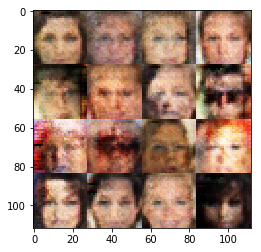

Epoch 1 of 1. Iteration 3610
  Discriminator Loss: 1.4398 || Generator Loss: 0.5622
Epoch 1 of 1. Iteration 3620
  Discriminator Loss: 1.3580 || Generator Loss: 0.7010
Epoch 1 of 1. Iteration 3630
  Discriminator Loss: 1.3342 || Generator Loss: 0.6567
Epoch 1 of 1. Iteration 3640
  Discriminator Loss: 1.3710 || Generator Loss: 0.6423
Epoch 1 of 1. Iteration 3650
  Discriminator Loss: 1.3303 || Generator Loss: 0.7283
Epoch 1 of 1. Iteration 3660
  Discriminator Loss: 1.2760 || Generator Loss: 0.7502
Epoch 1 of 1. Iteration 3670
  Discriminator Loss: 1.3845 || Generator Loss: 0.6331
Epoch 1 of 1. Iteration 3680
  Discriminator Loss: 1.2109 || Generator Loss: 0.7312
Epoch 1 of 1. Iteration 3690
  Discriminator Loss: 1.1673 || Generator Loss: 0.7617
Epoch 1 of 1. Iteration 3700
  Discriminator Loss: 1.1558 || Generator Loss: 0.8565
(?, 28, 28, 3)


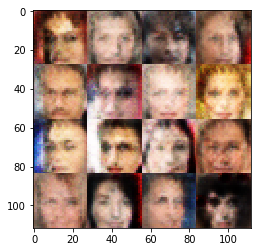

Epoch 1 of 1. Iteration 3710
  Discriminator Loss: 1.3090 || Generator Loss: 0.6813
Epoch 1 of 1. Iteration 3720
  Discriminator Loss: 1.3594 || Generator Loss: 0.6627
Epoch 1 of 1. Iteration 3730
  Discriminator Loss: 1.3685 || Generator Loss: 0.6722
Epoch 1 of 1. Iteration 3740
  Discriminator Loss: 1.4024 || Generator Loss: 0.6238
Epoch 1 of 1. Iteration 3750
  Discriminator Loss: 1.3329 || Generator Loss: 0.6247
Epoch 1 of 1. Iteration 3760
  Discriminator Loss: 1.4162 || Generator Loss: 0.6329
Epoch 1 of 1. Iteration 3770
  Discriminator Loss: 1.4509 || Generator Loss: 0.6323
Epoch 1 of 1. Iteration 3780
  Discriminator Loss: 1.2847 || Generator Loss: 0.6832
Epoch 1 of 1. Iteration 3790
  Discriminator Loss: 1.3056 || Generator Loss: 0.7530
Epoch 1 of 1. Iteration 3800
  Discriminator Loss: 1.3558 || Generator Loss: 0.6575
(?, 28, 28, 3)


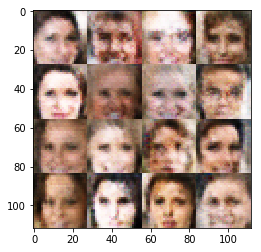

Epoch 1 of 1. Iteration 3810
  Discriminator Loss: 1.3913 || Generator Loss: 0.5982
Epoch 1 of 1. Iteration 3820
  Discriminator Loss: 1.5857 || Generator Loss: 0.5266
Epoch 1 of 1. Iteration 3830
  Discriminator Loss: 1.3179 || Generator Loss: 0.6758
Epoch 1 of 1. Iteration 3840
  Discriminator Loss: 1.4616 || Generator Loss: 0.6314
Epoch 1 of 1. Iteration 3850
  Discriminator Loss: 1.3396 || Generator Loss: 0.6822
Epoch 1 of 1. Iteration 3860
  Discriminator Loss: 1.3213 || Generator Loss: 0.6713
Epoch 1 of 1. Iteration 3870
  Discriminator Loss: 1.2831 || Generator Loss: 0.6909
Epoch 1 of 1. Iteration 3880
  Discriminator Loss: 1.4054 || Generator Loss: 0.6063
Epoch 1 of 1. Iteration 3890
  Discriminator Loss: 1.2991 || Generator Loss: 0.6898
Epoch 1 of 1. Iteration 3900
  Discriminator Loss: 1.2802 || Generator Loss: 0.7014
(?, 28, 28, 3)


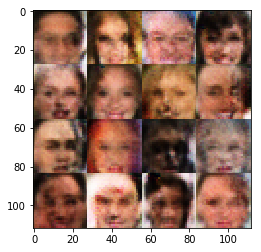

Epoch 1 of 1. Iteration 3910
  Discriminator Loss: 1.3089 || Generator Loss: 0.7050
Epoch 1 of 1. Iteration 3920
  Discriminator Loss: 1.2574 || Generator Loss: 0.6756
Epoch 1 of 1. Iteration 3930
  Discriminator Loss: 1.3189 || Generator Loss: 0.7138
Epoch 1 of 1. Iteration 3940
  Discriminator Loss: 1.3566 || Generator Loss: 0.6786
Epoch 1 of 1. Iteration 3950
  Discriminator Loss: 1.2934 || Generator Loss: 0.6963
Epoch 1 of 1. Iteration 3960
  Discriminator Loss: 1.2431 || Generator Loss: 0.7577
Epoch 1 of 1. Iteration 3970
  Discriminator Loss: 1.2491 || Generator Loss: 0.7282
Epoch 1 of 1. Iteration 3980
  Discriminator Loss: 1.4233 || Generator Loss: 0.5476
Epoch 1 of 1. Iteration 3990
  Discriminator Loss: 1.3197 || Generator Loss: 0.6773
Epoch 1 of 1. Iteration 4000
  Discriminator Loss: 1.2691 || Generator Loss: 0.7225
(?, 28, 28, 3)


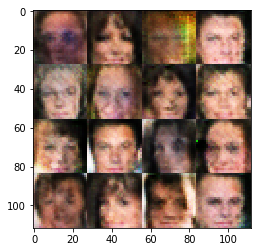

Epoch 1 of 1. Iteration 4010
  Discriminator Loss: 1.4610 || Generator Loss: 0.5770
Epoch 1 of 1. Iteration 4020
  Discriminator Loss: 1.3411 || Generator Loss: 0.6873
Epoch 1 of 1. Iteration 4030
  Discriminator Loss: 1.2913 || Generator Loss: 0.6918
Epoch 1 of 1. Iteration 4040
  Discriminator Loss: 1.3397 || Generator Loss: 0.6790
Epoch 1 of 1. Iteration 4050
  Discriminator Loss: 1.4358 || Generator Loss: 0.5986


In [14]:
batch_size = 50
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.